# Regresja

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Boston

In [8]:
boston = datasets.load_boston()
# print description
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
# get the data
boston_X = boston.data
boston_Y = boston.target

Podzielmy zbiór na część testową i treningową .

In [10]:
# Split the data into training/testing sets
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

In [11]:
X=boston_X_train
y=boston_y_train

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy.


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)


In [13]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [0.3, 0.35, 0.4]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X, y)
grid_1.best_params_

{'elasticnet__alpha': 0.3, 'polynomialfeatures__degree': 1}

In [14]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_2.fit(X, y)
grid_2.best_params_

{'lasso__alpha': 0.1, 'polynomialfeatures__degree': 1}

In [19]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge(alpha=1, tol=0.1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [0.1, 1, 2, 3]},
                    cv=5,
                    refit=True)
grid_3.fit(X, y)
grid_3.best_params_

C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.966219240689948e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0416200068852991e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.5089865252423e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Re

C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.621150426257029e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.8002964874847074e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.465863822082668e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. 

{'polynomialfeatures__degree': 1, 'ridge__alpha': 3}

In [20]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_4.fit(X, y)
print(grid_4.best_params_)
grid_4.best_estimator_

{'polynomialfeatures__degree': 1}


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [58]:
from sklearn.svm import SVR
grid_5 = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                    param_grid={"C": [300, 400, 500, 1000, 1500, 2000], 
                                "gamma": [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]},
                    cv=kfold,
                    refit=True)
grid_5.fit(X, y)
print(grid_5.best_params_)
grid_5.best_estimator_

{'C': 1000, 'gamma': 1e-05}


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
from sklearn import  metrics

X_test=boston_X_test
y_test=boston_y_test

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
models.append(('SVR', grid_5.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: 0.29382006308736974
Explained variance score: 0.294349753785489
Median absolute error: 2.0759346938347463
Mean squared error: 13.320601531989254
Mean absolute errors: 2.772276391728127
Lasso
R^2: 0.3311669435943563
Explained variance score: 0.331737480548411
Median absolute error: 2.089430615521554
Mean squared error: 12.61613105967402
Mean absolute errors: 2.7348023954450844
Ridge
R^2: 0.360607969558849
Explained variance score: 0.36102475698984526
Median absolute error: 2.1297726710775704
Mean squared error: 12.060787931008388
Mean absolute errors: 2.669543281777572
LR
R^2: 0.41861839023790204
Explained variance score: 0.4215186903562268
Median absolute error: 2.094421193908156
Mean squared error: 10.966543166781477
Mean absolute errors: 2.538852413696596
SVR
R^2: 0.4351604998720223
Explained variance score: 0.4357316154672667
Median absolute error: 1.7147953301903804
Mean squared error: 10.65451100696403
Mean absolute errors: 2.442421251463089


In [60]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet','Lasso','Ridge','LR','SVR'])
df

,Method,explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2
0,ElasticNet,0.294350,2.772276,13.320602,2.075935,0.293820
1,Lasso,0.331737,2.734802,12.616131,2.089431,0.331167
2,Ridge,0.361025,2.669543,12.060788,2.129773,0.360608
3,LR,0.421519,2.538852,10.966543,2.094421,0.418618
4,SVR,0.435732,2.442421,10.654511,1.714795,0.435160


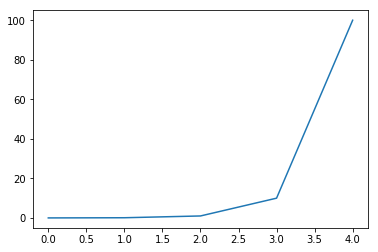

In [61]:
plt.plot(np.logspace(-2, 2, 5))
#plt.axis("equal")
plt.show()